In [3]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

for i in range(1,71):
    if i == 1:
        patient = "01"
        filename = 'Diabetes-Data/data-'+ patient
        rawdata = pd.read_table(filename, names = ["date", "time","code", "value" ])
        rawdata['patient'] = patient
    else:
        if i < 10 and i != 1:
            patient = "0" + str(i)
        else:
            patient = str(i)
        filename = 'Diabetes-Data/data-' + patient
        temp = pd.read_table(filename, names = ["date", "time","code", "value" ])
        temp['patient'] = patient

        rawdata = pd.concat([rawdata, temp])

data = rawdata.copy()
data['patient'] = pd.to_numeric(data['patient'], errors='coerce', downcast="integer")

data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29330 entries, 0 to 340
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     29297 non-null  object
 1   time     29330 non-null  object
 2   code     29330 non-null  int64 
 3   value    29297 non-null  object
 4   patient  29330 non-null  int8  
dtypes: int64(1), int8(1), object(3)
memory usage: 1.1+ MB


In [5]:
# remove rows with missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29264 entries, 0 to 340
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     29264 non-null  object
 1   time     29264 non-null  object
 2   code     29264 non-null  int64 
 3   value    29264 non-null  object
 4   patient  29264 non-null  int8  
dtypes: int64(1), int8(1), object(3)
memory usage: 1.1+ MB


In [6]:
#drop non numeric values of "value" and change value from object to float
data['value'] = pd.to_numeric(data['value'], errors='coerce')
data = data.dropna()
data

,date,time,code,value,patient
0,04-21-1991,9:09,58,100.0,1
1,04-21-1991,9:09,33,9.0,1
2,04-21-1991,9:09,34,13.0,1
3,04-21-1991,17:08,62,119.0,1
4,04-21-1991,17:08,33,7.0,1
...,...,...,...,...,...
336,05-09-1989,08:00,33,1.0,70
337,05-09-1989,08:00,34,7.0,70
338,05-10-1989,08:00,34,7.0,70
339,05-11-1989,08:00,34,7.0,70


<AxesSubplot:>

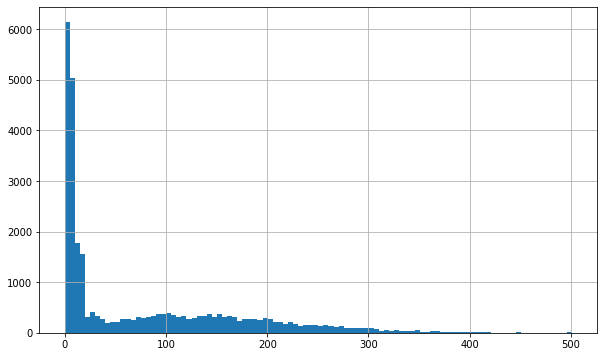

In [5]:
plt.figure(figsize=(10, 6))
data['value'].hist(bins=100)

In [7]:
# interested only in codes:
    #69 = Typical exercise activity
    #70 = More-than-usual exercise activity
    #71 = Less-than-usual exercise activity 
training_data = data.loc[(data["code"] == 69) | (data["code"] == 70) | (data["code"] == 71)]
data


,date,time,code,value,patient
0,04-21-1991,9:09,58,100.0,1
1,04-21-1991,9:09,33,9.0,1
2,04-21-1991,9:09,34,13.0,1
3,04-21-1991,17:08,62,119.0,1
4,04-21-1991,17:08,33,7.0,1
...,...,...,...,...,...
336,05-09-1989,08:00,33,1.0,70
337,05-09-1989,08:00,34,7.0,70
338,05-10-1989,08:00,34,7.0,70
339,05-11-1989,08:00,34,7.0,70


In [8]:
plt.figure(figsize=(10, 6))
training_data['value'].hist(bins=100)

<AxesSubplot:>